# Regressão Linear Simples

## 1. Informações do Dataset

### 1.1 Dataset 

Boston Housing Dataset, que é um conjunto de dados que tem a taxa média de ocupação das casas, juntamente com outras 13 variáveis que podem estar relacionadas aos preços das casas. Esses são os fatores como condições socioeconômicas, condições ambientais, instalações educacionais e alguns outros fatores semelhantes. Existem 506 observações nos dados para 14 variáveis. Existem 12 variáveis numéricas em nosso conjunto de dados e 1 variável categórica. O objetivo é construir um modelo de regressão linear para estimar a taxa média de ocupação das casas pelos proprietários em Boston.

In [1]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston() 

### 1.2 Características do Dataset

Multivariado <br>
Número de instâncias: 506 <br>
Número de atributos: 14 <br>
Valores faltando: Não <br>
Características dos atributos: categórico, inteiro e real <br>
Origem: StatLib library que é mantido pela Universidade de Carnegie Mellon

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

1. CRIM: per capita crime rate by town                                        (taxa de criminalidade per capita na cidade )
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. )
3. INDUS: proportion of non-retail business acres per town (proporção de acres de negócios não varejistas por cidade )
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (Variável dummy de Charles River (= 1 se a área limita o rio; 0 caso contrário))
5. NOX: nitric oxides concentration (parts per 10 million) (concentração de óxidos nítricos (partes por 10 milhões) )
6. RM: average number of rooms per dwelling (número médio de quartos por habitação)
7. AGE: proportion of owner-occupied units built prior to 1940 (proporção de unidades ocupadas pelo proprietário construídas antes de 1940 )
8. DIS: weighted distances to five Boston employment centres (distâncias ponderadas até cinco centros de empregos de Boston )
9. RAD: index of accessibility to radial highways (índice de acessibilidade a rodovias radiais )
10. TAX: full-value property-tax rate per 10,000 (valor total da taxa de imposto sobre a propriedade por 10.000 )
11. PTRATIO: pupil-teacher ratio by town (proporção aluno-professor por cidade )
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (1000 (Bk - 0,63) ^ 2, onde Bk é a proporção de negros por cidade )
13. LSTAT: % lower status of the population (% de status inferior da população )
14. TARGET: Median value of owner-occupied homes in 1000 dolarés (Valor médio das casas ocupadas pelo proprietário em US $ 1.000 )

## 2. Bibliotecas

In [2]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

## 3. Análise Exploratória 



### 3.1 Dataframe

In [3]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [4]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
dataset.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

### 3.2 Algumas Estatísticas

In [6]:
# Calculando a média da variável de resposta
valor_medio_esperado_na_previsao = dataset['target'].mean()

In [7]:
valor_medio_esperado_na_previsao

22.532806324110698

In [8]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que 
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos 
# ainda não foram calculados.

squared_errors = pd.Series(valor_medio_esperado_na_previsao - dataset['target'])**2 
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


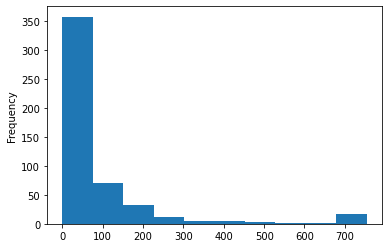

In [9]:
# Histograma dos erros
# Temos mais erros "pequenos", ou seja, mais valores próximos à média.
hist_plot = squared_errors.plot(kind='hist')

### 3.3 Correlação das colunas

In [10]:
# Calculando a correlação  
correlacoes = dataset.corr()

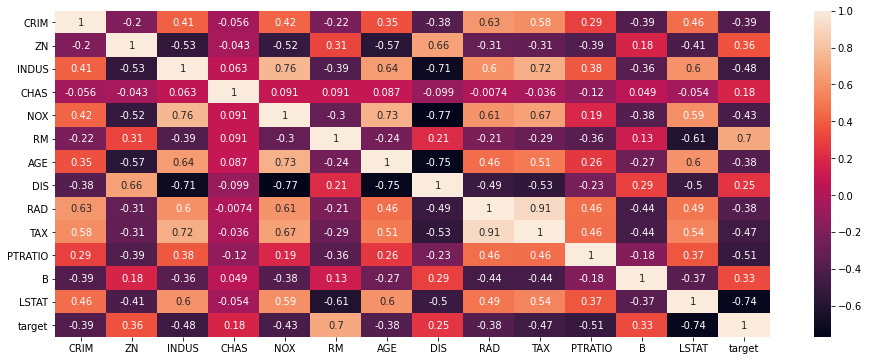

In [11]:
# Usando o método heatmap do seaborn
plt.figure(figsize = (16, 6))
sns.heatmap(data = correlacoes, annot = True);

Para Regressão Linear Simples usaremos como variável explanatória a variável ZN que representa a proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.

In [12]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias = 0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations - min(bias, 1)))

In [13]:
# Imprimindo o desvio padrão via fórmula e via NumPy da variável ZN
print ('Resultado da Função: %0.5f \nResultado do Numpy: %0.5f' % (calc_desvio_padrao(dataset['ZN']), np.std(dataset['ZN'])))

Resultado da Função: 23.29940 
Resultado do Numpy: 23.29940


In [14]:
# Funções para calcular a variância da variável ZN e a correlação com a variável target
def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations - min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)

In [15]:
# Compara o resultado das nossas funções com a função pearsonr do SciPy
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(dataset['ZN'], dataset['target'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(dataset['ZN'], dataset['target'])[0])

Nossa estimativa de Correlação: 0.36045
Correlação a partir da função pearsonr do SciPy: 0.36045


In [16]:
# Definindo o range dos valores de x e y
x_range = [dataset['ZN'].min(),dataset['ZN'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

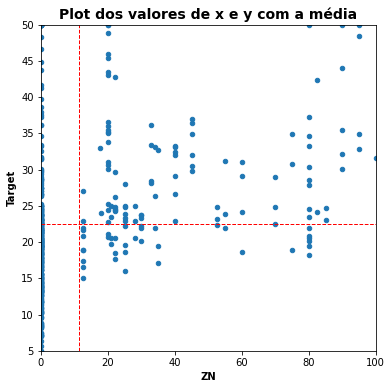

In [17]:
# Plot dos valores de x e y com a média
scatter_plot = dataset.plot(kind = 'scatter', x = 'ZN', y = 'target', xlim = x_range, ylim = y_range, figsize = (6, 6))

# Cálculo da média
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['ZN'].mean(), dataset['ZN'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Estilo do gráfico
plt.title('Plot dos valores de x e y com a média', weight = 'bold', size = '14')
plt.xlabel('ZN', weight = 'bold')
plt.ylabel('Target', weight = 'bold');

## 4. Regressão Linear com Statsmodels

https://www.statsmodels.org/stable/index.html

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
# Definindo os valores de X e y
X = dataset['ZN']
y = dataset['target'].values

In [20]:
# Adicionando um termo constante ao valor de X (Matriz)
X = sm.add_constant(X)
X = X.values

In [21]:
# Fit modelo de regressão
modelo = sm.OLS(y, X).fit()

# Estatística
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     75.26
Date:                Tue, 04 May 2021   Prob (F-statistic):           5.71e-17
Time:                        22:08:10   Log-Likelihood:                -1805.0
No. Observations:                 506   AIC:                             3614.
Df Residuals:                     504   BIC:                             3623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9176      0.425     49.248      0.0

* R-quadrado é 0.13.

* O valor p (P>|t|) é pequeno, o que significa que ZN é um indicador estatisticamente significativo do target.


In [22]:
print('Predicted values: ', modelo.predict(X))

Predicted values:  [23.47609901 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912
 22.69432904 22.69432904 22.69432904 22.69432904 22.69432904 22.69432904
 22.69432904 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912
 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912
 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912
 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912
 20.91757912 20.91757912 20.91757912 31.57807868 31.57807868 20.91757912
 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912
 20.91757912 20.91757912 23.902519   23.902519   23.902519   23.902519
 31.57807868 33.71017859 32.99947862 35.13157853 24.47107897 24.47107897
 24.47107897 24.47107897 24.47107897 24.47107897 23.40502902 32.28877865
 32.28877865 22.69432904 22.69432904 22.69432904 20.91757912 20.91757912
 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912 20.91757912
 20.91757912 20.91757912 24.471078

In [23]:
predictions = modelo.predict(X)
df_results = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_results

,Actual,Predicted
0,24.0,23.476099
1,21.6,20.917579
2,34.7,20.917579
3,33.4,20.917579
4,36.2,20.917579
...,...,...
501,22.4,20.917579
502,20.6,20.917579
503,23.9,20.917579
504,22.0,20.917579


### 4.1 Gerando um ScatterPlot com a Linha de Regressão

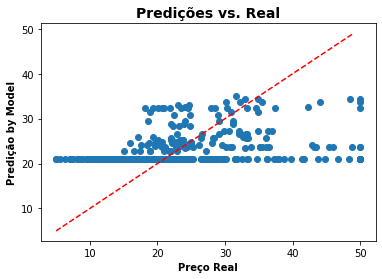

In [24]:
predicted_prices = modelo.fittedvalues

plt.scatter(x = 'Actual', y = 'Predicted', data = df_results)

plt.title("Predições vs. Real", weight = 'bold', size = '14')
plt.xlabel("Preço Real", weight = 'bold');
plt.ylabel("Predição by Model", weight = 'bold')

d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color = 'red', linestyle = '--')
plt.show()